In [1]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load the Iris dataset and prepare training/testing splits
dataset = load_iris()
X_data = dataset.data
y_labels = dataset.target

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_data, y_labels, test_size=0.2, random_state=10)


In [3]:

# Define and evaluate basic models
initial_models = {
    "LogisticRegression": LogisticRegression(max_iter=250),
    "RandomForest": RandomForestClassifier(),
    "SupportVectorMachine": SVC()
}

performance_scores = {}

for model_id, model in initial_models.items():
    model.fit(X_train_set, y_train_set)
    pred_output = model.predict(X_test_set)

    performance_scores[model_id] = {
        "Accuracy": accuracy_score(y_test_set, pred_output),
        "Precision": precision_score(y_test_set, pred_output, average='weighted'),
        "Recall": recall_score(y_test_set, pred_output, average='weighted'),
        "F1Score": f1_score(y_test_set, pred_output, average='weighted')
    }

pd.DataFrame(performance_scores).T


,Accuracy,Precision,Recall,F1Score
LogisticRegression,1.000000,1.000000,1.000000,1.000000
RandomForest,0.966667,0.970833,0.966667,0.967111
SupportVectorMachine,0.966667,0.970833,0.966667,0.967111


In [4]:

# Randomized search for Random Forest
rf_hyperparams = {
    'n_estimators': [60, 120, 180],
    'max_depth': [None, 8, 16],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3]
}

random_search_rf_model = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_hyperparams,
    n_iter=5,
    cv=3,
    random_state=10
)

random_search_rf_model.fit(X_train_set, y_train_set)
optimized_rf = random_search_rf_model.best_estimator_


In [5]:

# Grid search for SVM
svm_parameters = {
    'C': [0.5, 1.0, 5.0],
    'kernel': ['linear', 'rbf']
}

grid_search_svm_model = GridSearchCV(SVC(), svm_parameters, cv=3)
grid_search_svm_model.fit(X_train_set, y_train_set)
optimized_svm = grid_search_svm_model.best_estimator_


In [6]:

# Evaluate tuned models
refined_models = {
    "RandomForest_Tuned": optimized_rf,
    "SVM_Tuned": optimized_svm
}

refined_scores = {}

for tag, model in refined_models.items():
    refined_pred = model.predict(X_test_set)
    refined_scores[tag] = {
        "Accuracy": accuracy_score(y_test_set, refined_pred),
        "Precision": precision_score(y_test_set, refined_pred, average='weighted'),
        "Recall": recall_score(y_test_set, refined_pred, average='weighted'),
        "F1Score": f1_score(y_test_set, refined_pred, average='weighted')
    }

pd.DataFrame(refined_scores).T


,Accuracy,Precision,Recall,F1Score
RandomForest_Tuned,1.000000,1.000000,1.000000,1.000000
SVM_Tuned,0.966667,0.970833,0.966667,0.967111


In [7]:

# Combine and compare all models
combined_scores = {**performance_scores, **refined_scores}
final_scores_df = pd.DataFrame(combined_scores).T

# Identify top model by F1 Score
final_scores_df['F1Score'] = final_scores_df['F1Score'].astype(float)
top_model = final_scores_df['F1Score'].idxmax()
top_model_result = final_scores_df.loc[top_model]

print("Best Performing Model:", top_model)
print(top_model_result)

final_scores_df.sort_values(by='F1Score', ascending=False)


Best Performing Model: LogisticRegression
Accuracy     1.0
Precision    1.0
Recall       1.0
F1Score      1.0
Name: LogisticRegression, dtype: float64


,Accuracy,Precision,Recall,F1Score
LogisticRegression,1.000000,1.000000,1.000000,1.000000
RandomForest_Tuned,1.000000,1.000000,1.000000,1.000000
RandomForest,0.966667,0.970833,0.966667,0.967111
SupportVectorMachine,0.966667,0.970833,0.966667,0.967111
SVM_Tuned,0.966667,0.970833,0.966667,0.967111


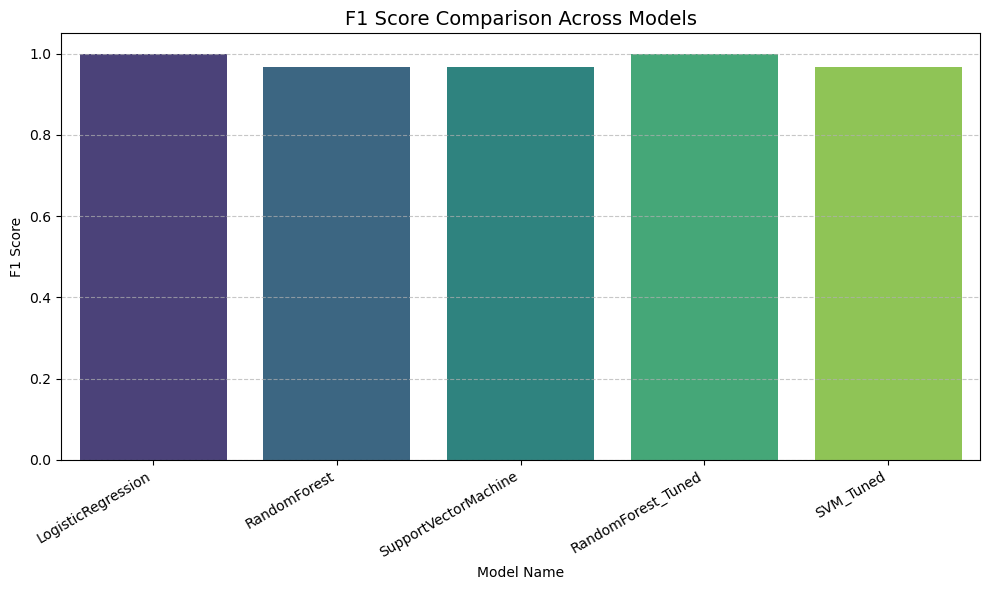

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot F1 scores of all models
plt.figure(figsize=(10, 6))
sns.barplot(x=final_scores_df.index, y=final_scores_df["F1Score"], palette="viridis")

plt.title("F1 Score Comparison Across Models", fontsize=14)
plt.ylabel("F1 Score")
plt.xlabel("Model Name")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
